In [32]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


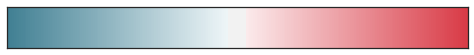

In [39]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='white')
cmap = sns.choose_diverging_palette(as_cmap=True)

In [33]:
%aimport dasci.data.explore

import dasci.data.explore as expl

# Load data

In [6]:
df = expl.load_data(r'data\train.csv')

Loading c:\Projects\DS\KaggleHousePricesPrediction\data\train.csv


# Data overview

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# drop Id column
df.drop(['Id'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

## Missing values

In [11]:
df_missing = expl.missing_values_info(df)
df_missing

,Total,Percentage,Unique Count,Unique values
PoolQC,1453,0.995205,3,"[nan, Ex, Fa, Gd]"
MiscFeature,1406,0.963014,4,"[nan, Shed, Gar2, Othr, TenC]"
Alley,1369,0.937671,2,"[nan, Grvl, Pave]"
Fence,1179,0.807534,4,"[nan, MnPrv, GdWo, GdPrv, MnWw]"
FireplaceQu,690,0.472603,5,"[nan, TA, Gd, Fa, Ex, Po]"
LotFrontage,259,0.177397,110,NaN
GarageType,81,0.055479,6,"[Attchd, Detchd, BuiltIn, CarPort, nan, Basmen..."
GarageCond,81,0.055479,5,"[TA, Fa, nan, Gd, Po, Ex]"
GarageFinish,81,0.055479,3,"[RFn, Unf, Fin, nan]"
GarageQual,81,0.055479,5,"[TA, Fa, Gd, nan, Ex, Po]"


Let's drop features with more than 10% missing data as it is rather hard to guess what values should be used and features don't look very promising.

In [12]:
df_missing[df_missing['Percentage'] > 0.1].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [13]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace=True)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [14]:
# drop row with missing Electrical value
df.drop(df.loc[df['Electrical'].isnull()].index, inplace=True)

In [15]:
garage_columns = ['GarageCars', 'GarageArea', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']   
df.loc[df[garage_columns].isnull().any(axis=1), garage_columns]

,GarageCars,GarageArea,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,0,0,NaN,NaN,NaN,NaN,NaN
48,0,0,NaN,NaN,NaN,NaN,NaN
78,0,0,NaN,NaN,NaN,NaN,NaN
88,0,0,NaN,NaN,NaN,NaN,NaN
89,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1349,0,0,NaN,NaN,NaN,NaN,NaN
1407,0,0,NaN,NaN,NaN,NaN,NaN
1449,0,0,NaN,NaN,NaN,NaN,NaN
1450,0,0,NaN,NaN,NaN,NaN,NaN


Looks like that all missing vaules are for houses without garage, hence we can fill them

In [16]:
df["GarageType"].fillna("No", inplace=True)
df["GarageFinish"].fillna("No", inplace=True)
df["GarageQual"].fillna("No", inplace=True)
df["GarageCond"].fillna("No", inplace=True)
df.loc[df["GarageYrBlt"].isnull(), ["GarageYrBlt"]] = df.loc[df["GarageYrBlt"].isnull(), "YearBuilt"]

In [17]:
bsmt_columns = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']     
df.loc[df[bsmt_columns].isnull().any(axis=1), bsmt_columns]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,0,0,0,0,NaN,NaN,NaN,NaN,NaN
39,0,0,0,0,NaN,NaN,NaN,NaN,NaN
90,0,0,0,0,NaN,NaN,NaN,NaN,NaN
102,0,0,0,0,NaN,NaN,NaN,NaN,NaN
156,0,0,0,0,NaN,NaN,NaN,NaN,NaN
182,0,0,0,0,NaN,NaN,NaN,NaN,NaN
259,0,0,0,0,NaN,NaN,NaN,NaN,NaN
332,1124,479,1603,3206,Gd,TA,No,GLQ,NaN
342,0,0,0,0,NaN,NaN,NaN,NaN,NaN
362,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [18]:
df["BsmtCond"].fillna("No", inplace=True)
df["BsmtQual"].fillna("No", inplace=True)
df["BsmtExposure"].fillna("No", inplace=True)
df["BsmtFinType1"].fillna("No", inplace=True)
df["BsmtFinType2"].fillna("No", inplace=True)

In [19]:
df["MasVnrType"].fillna("None", inplace=True)
df["MasVnrArea"].fillna("0", inplace=True)

In [20]:
expl.missing_values_info(df)

,Total,Percentage,Unique Count,Unique values


## Adjusting column types

In [23]:
# Some numerical features are actually really categories
df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                            50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                            80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                            150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
            "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                        7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}}, inplace=True)

In [24]:
# Encode some categorical features as ordered numbers when there is information in the order
df.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
           "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
           "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                             "ALQ" : 5, "GLQ" : 6},
           "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                             "ALQ" : 5, "GLQ" : 6},
           "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
           "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
           "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
           "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                           "Min2" : 6, "Min1" : 7, "Typ" : 8},
           "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
           "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
           "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
           "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
           "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
           "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
           "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
           "Street" : {"Grvl" : 1, "Pave" : 2},
           "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}, inplace=True)

In [27]:
df.dtypes

MSSubClass        object
MSZoning          object
LotArea            int64
Street             int64
LotShape           int64
LandContour       object
Utilities          int64
LotConfig         object
LandSlope          int64
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea        object
ExterQual          int64
ExterCond          int64
Foundation        object
BsmtQual           int64
BsmtCond          object
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1         int64
BsmtFinType2       int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC          int64
CentralAir        object
Electrical        object


Remove feature 'Utilities' for most of the houses it takes value 4 and it causes problem with StandartScaler The problem was detected after getting two high error for some rows and checking stdScalar.scale_

In the future:

* check features distribution
* scale_
* value ranges

In [28]:
df["Utilities"].value_counts()

4    1458
2       1
Name: Utilities, dtype: int64

In [35]:
suspicious_columns = expl.suspicious_columns_info(df)
suspicious_columns

{'Street': '{2: 1453, 1: 6}',
 'Utilities': '{4: 1458, 2: 1}',
 'Condition2': "{'Norm': 1444, 'Feedr': 6, 'RRNn': 2, 'Artery': 2, 'PosN': 2, 'RRAn': 1, 'RRAe': 1, 'PosA': 1}",
 'RoofMatl': "{'CompShg': 1433, 'Tar&Grv': 11, 'WdShngl': 6, 'WdShake': 5, 'ClyTile': 1, 'Metal': 1, 'Roll': 1, 'Membran': 1}",
 'Heating': "{'GasA': 1427, 'GasW': 18, 'Grav': 7, 'Wall': 4, 'OthW': 2, 'Floor': 1}",
 'KitchenAbvGr': '{1: 1391, 2: 65, 3: 2, 0: 1}',
 'PoolArea': '{0: 1452, 738: 1, 648: 1, 576: 1, 555: 1, 519: 1, 512: 1, 480: 1}'}

In [36]:
df.drop(suspicious_columns.keys(), axis=1, inplace=True)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', '

In [38]:
df.to_csv(r'output\train_cleaned.csv')